<h1> Machine Learning Lab Assignment - 3 </h2>


```
Kaushik Prajapati - 202201472
```



In [44]:
import numpy as np
import random as rd
import pandas as pd
import matplotlib.pyplot as plt

<p align="justify"> Q1. Generate 400 data points in $R^2$ from the uniform distribution $U[0,1]$. Construct the training set $T_{tr} = \{ (x_{11}, x_{21}, y_1),(x_{21}, x_{22}, y_2),...,(x_{400,1}, x_{400,2}, y_{100})\}$ using the relation,

$$Y_i = sin(2π(x_{i1}^{2}+x_{i2}^{2})) + ε_i $$

<p align="center"> where $ε_i $ ~ $ N(0,0.25) $ </p>

<p align="justify"> In the similar way, construct a testing set of size 50 i.e. $T_{ts} = \{ (x^{'}_{11}, x^{'}_{12}, y^{'}_{1}),(x^{'}_{21}, x^{'}_{22},y^{'}_{2}),...,(x^{'}_{50,1}, x^{'}_{50,2}, y^{'}_{50})\}$. Estimate the regularized polynomial regression of order 6 with direct method and obtain the 3d plot on test set along with test data points. Find the NMSE, RMSE, MAE and R2.

<p> Generating Training Set, $$T_{tr} = \{ (x_{11}, x_{21}, y_1),(x_{21}, x_{22}, y_2),...,(x_{400,1}, x_{400,2}, y_{100})\}$$
and Testing Set, $$T_{ts} = \{ (x^{'}_{11}, x^{'}_{12}, y^{'}_{1}),(x^{'}_{21}, x^{'}_{22},y^{'}_{2}),...,(x^{'}_{50,1}, x^{'}_{50,2}, y^{'}_{50})\}$$

In [45]:
x_train = np.random.uniform(low=0, high=1, size=(2, 400))
y_train = np.array([np.sin(2*np.pi*(x_train[0][i]**2 + x_train[1][i]**2)) + np.random.normal(0, 0.5) for i in range(400)])

x_test = np.random.uniform(low=0, high=1, size=(2, 50))
y_test = np.array([np.sin(2*np.pi*(x_test[0][i]**2 + x_test[1][i]**2)) + np.random.normal(0, 0.5) for i in range(50)])

<p> Ploting Training Set T and Testing Set Test.

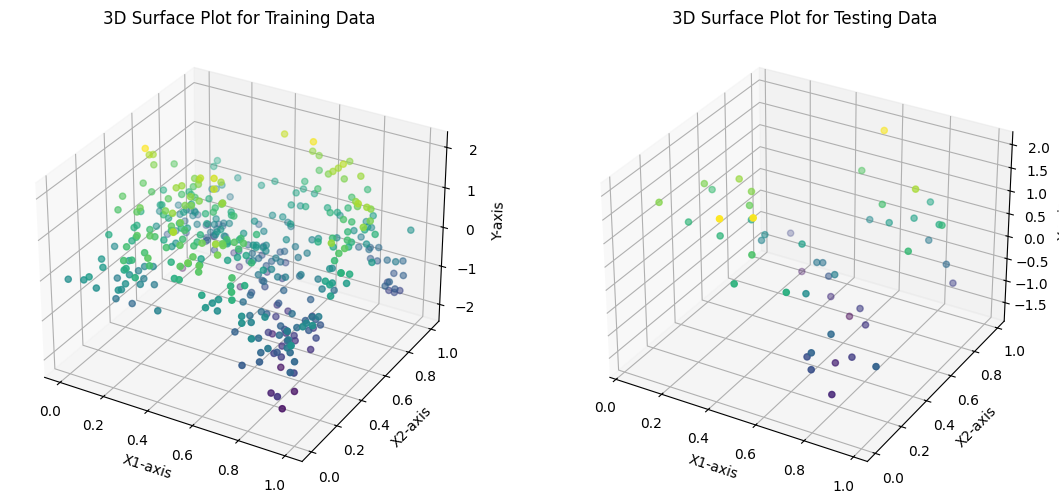

In [46]:
fig = plt.figure(figsize=(12, 6))

ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.scatter3D(x_train[0], x_train[1], y_train, c=y_train, cmap='viridis')
ax.set_xlabel('X1-axis')
ax.set_ylabel('X2-axis')
ax.set_zlabel('Y-axis')
ax.set_title('3D Surface Plot for Training Data')

ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.scatter3D(x_test[0], x_test[1], y_test, c=y_test, cmap='viridis')
ax.set_xlabel('X1-axis')
ax.set_ylabel('X2-axis')
ax.set_zlabel('Y-axis')
ax.set_title('3D Surface Plot for Testing Data')

plt.tight_layout(pad=5)
plt.show()

<p> Important Evaluation Parameter like RMSE, NMSE, MAE and R2 function implementation.

In [47]:
def NMSE(y_true, y_pred):

    n = len(y_true)
    y_mean = sum(y_true) / n
    se, se_mean = 0.0, 0.0
    for i in range(n):
        se += ((y_true[i]-y_pred[i]) ** 2)
        se_mean += ((y_true[i]-y_mean) ** 2)
    if se_mean == 0:
        return "Divide by zero!"
    nmse = se/se_mean
    return nmse

def RMSE(y_true, y_pred):
    n = len(y_true)
    rmse = 0.0
    for i in range(n):
        rmse += ((y_true[i]-y_pred[i]) ** 2)
    rmse /= n
    rmse = np.sqrt(rmse)
    return rmse

def MAE(y_true, y_pred):
    n = len(y_true)
    mae = 0.0
    for i in range(n):
        mae += abs(y_true[i]-y_pred[i])
    mae /= n
    return mae

def R2(y_true, y_pred):
    n = len(y_true)
    SSres = 0.0
    SStot = 0.0
    for i in range(n):
        SSres += ((y_true[i]-y_pred[i]) ** 2)
        SStot += ((y_true[i]-np.mean(y_true)) ** 2)
    if SStot == 0:
        return 1
    return 1 - (SSres/SStot)

<p> Train regularized regression function, prediction regularized regression function, generate A matrix function and graph ploting function implementations.

In [48]:
def generateAMatrix(M, X):
    A = []
    N = len(X[0])
    for i in range(N):
        row = []
        for power_sum in range(M+1):
            for x1_power in range(power_sum+1):
                x2_power = power_sum-x1_power
                row.append((X[0][i] ** (x1_power)) * (X[1][i] ** (x2_power)))
        A.append(row)
    return np.array(A)

def train_regularized_regression_model(A, y, k):
    n = len(A[0])
    At = np.transpose(A)
    At_A = At.dot(A)
    kI = k * np.identity(n)
    At_A_plus_kI = At_A + kI
    At_A_plus_kI_inv = np.linalg.inv(At_A_plus_kI)
    At_A_plus_kI_inv_At = At_A_plus_kI_inv.dot(At)
    w = At_A_plus_kI_inv_At.dot(y)
    return np.array(w)

def predict_regularized_regression_model(M, X, w):

    x = np.array(X)
    N = len(x[0])
    y = [0.0 for i in range(N)]
    for i in range(N):
        phi_row = []
        for power_sum in range(M+1):
            for x1_power in range(power_sum+1):
                x2_power = power_sum-x1_power
                phi_row.append((x[0][i] ** (x1_power)) * (x[1][i] ** (x2_power)))
        y[i] = w.dot(phi_row)
    return np.array(y)

def plot_graph(M, w, X, Y, k_values, index):
    n = len(X[0])
    x1 = np.linspace(0, 1, n)
    x2 = np.linspace(0, 1, n)
    x1, x2 = np.meshgrid(x1, x2)
    y = np.sin(2*np.pi*(x1**2 + x2**2))

    ax = fig.add_subplot(5, 2, index, projection='3d')

    ax.scatter3D(X[0], X[1], Y, color='green')
    ax.plot_surface(x1, x2, y, cmap='viridis', alpha=0.8)
    ax.set_xlabel('X1-axis')
    ax.set_ylabel('X2-axis')
    ax.set_zlabel('Y-axis')
    ax.set_title(f'3D Surface Plot (k = {k_values[index-1]})')

<p align='justify'> Estimate the regularized polynomial regression of order 6 with direct method and obtain the 3d plot on test set along with test data points. Find the NMSE, RMSE, MAE and R2.

Regularized Polynomial Regression of order 6 with different values of λ.



λ      NMSE      RMSE       MAE        R2
0  0.000  0.410242  0.614805  0.471035  0.589758
1  0.001  0.426673  0.626997  0.504010  0.573327
2  0.010  0.511972  0.686817  0.543787  0.488028
3  0.100  0.693539  0.799380  0.643892  0.306461
4  0.500  0.763038  0.838477  0.688031  0.236962
5  1.000  0.789271  0.852768  0.705531  0.210729
6  2.000  0.817350  0.867804  0.722729  0.182650
7  4.000  0.846652  0.883223  0.739591  0.153348
8  5.000  0.856379  0.888282  0.745071  0.143621
9  6.000  0.864479  0.892473  0.749603  0.135521

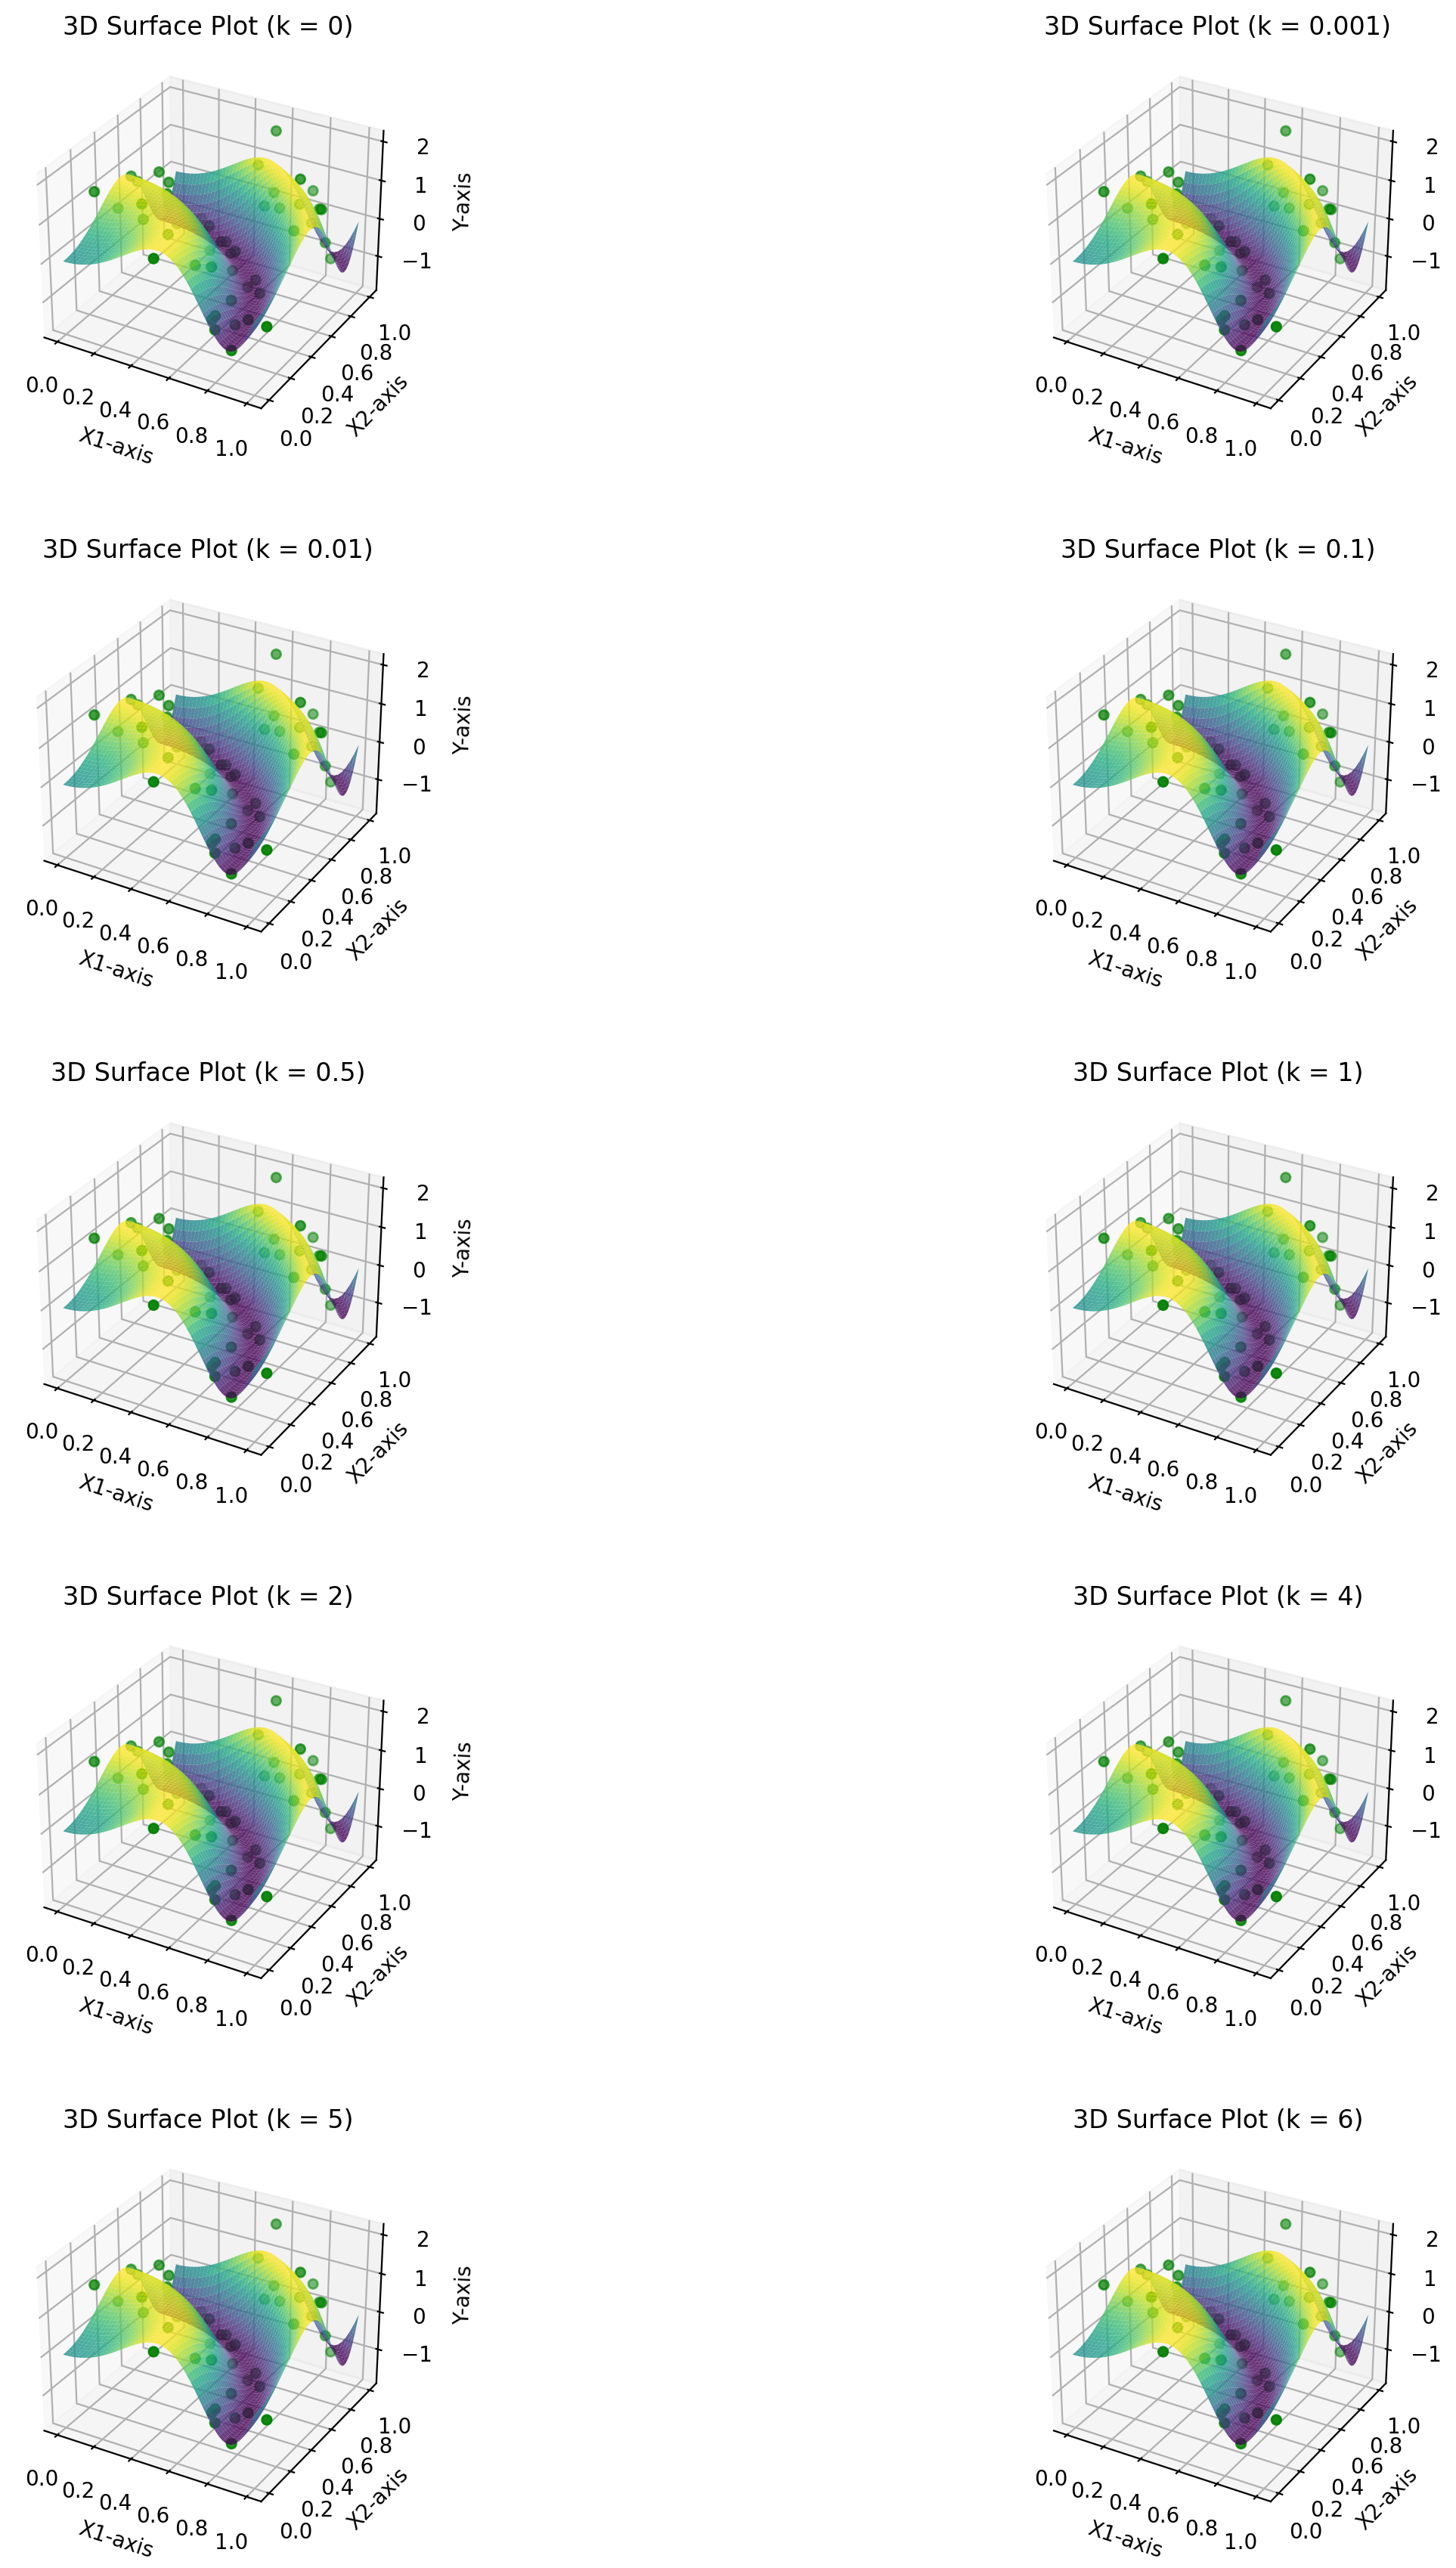

In [49]:
M = 6
A = generateAMatrix(M, x_train)
k_values = [0, 0.001, 0.01, 0.1, 0.5, 1, 2, 4, 5, 6]
data = {
    'λ'   : [],
    'NMSE': [],
    'RMSE': [],
    'MAE' : [],
    'R2'  : []
}

fig = plt.figure(figsize=(18, 18), dpi=200)
i = 0
for k in k_values:
    w = train_regularized_regression_model(A, y_train, k)
    y_pred = predict_regularized_regression_model(M, x_test, w)
    plot_graph(M, w, x_test, y_test, k_values, i+1)
    data['λ'].append(k)
    data['NMSE'].append(NMSE(y_test, y_pred))
    data['RMSE'].append(RMSE(y_test, y_pred))
    data['MAE'].append(MAE(y_test, y_pred))
    data['R2'].append(R2(y_test, y_pred))
    i += 1

print(f"Regularized Polynomial Regression of order 6 with different values of λ.\n")
df = pd.DataFrame(data)
display(df)

plt.tight_layout(pad=5)
plt.show()

<p> $NMSE$, $RMSE$, $MAE$ and $R^2$ vs $λ$.

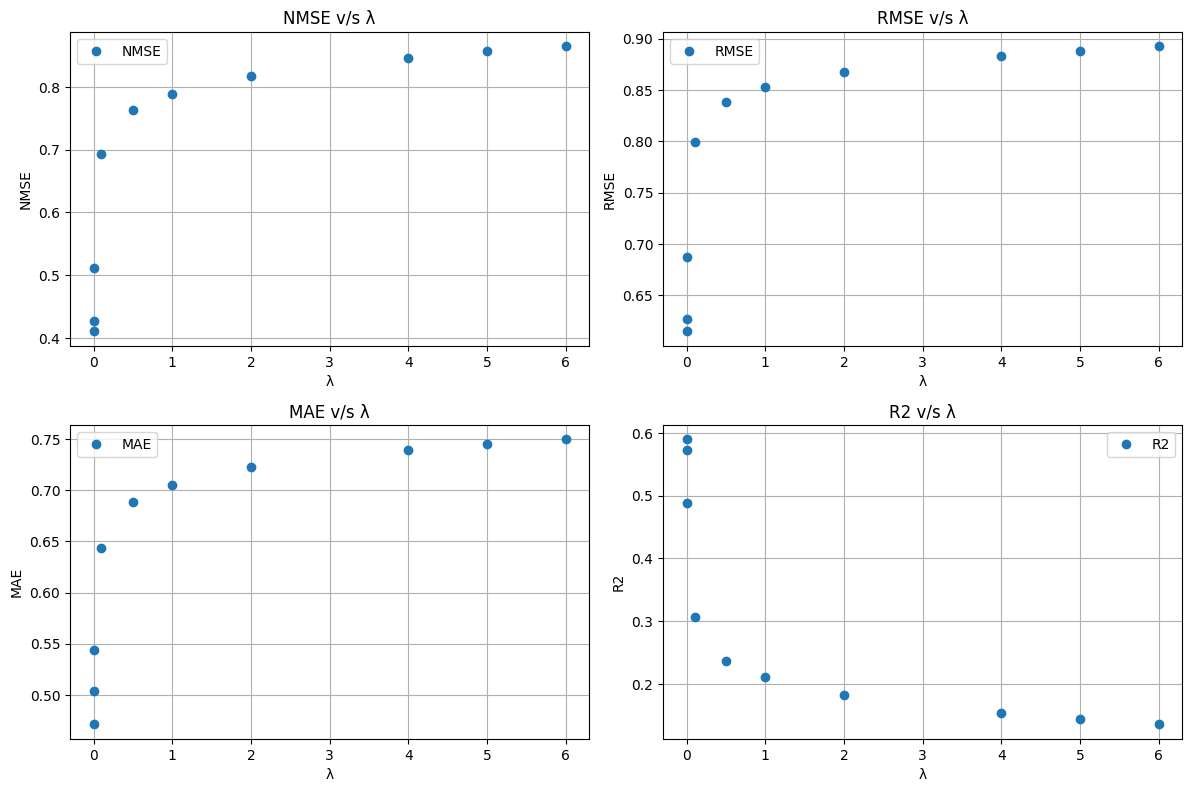

In [50]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.plot(df['λ'].values, df['NMSE'].values, 'o', label='NMSE')
plt.xlabel('λ')
plt.ylabel('NMSE')
plt.title('NMSE v/s λ')
plt.grid()
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(df['λ'].values, df['RMSE'].values, 'o', label='RMSE')
plt.xlabel('λ')
plt.ylabel('RMSE')
plt.title('RMSE v/s λ')
plt.grid()
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(df['λ'].values, df['MAE'].values, 'o', label='MAE')
plt.xlabel('λ')
plt.ylabel('MAE')
plt.title('MAE v/s λ')
plt.grid()
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(df['λ'].values, df['R2'].values, 'o', label='R2')
plt.xlabel('λ')
plt.ylabel('R2')
plt.title('R2 v/s λ')
plt.grid()
plt.legend()

plt.tight_layout(pad=1)
plt.show()

<h3><bold>Observations:</bold></h3>
<p> From above graphs we can conclude that NMSE, RMSE and MAE increases with increase in parameter λ and R2 decreases with increase in parameter λ.

<p align='justify'> 2. Consider the dataset 1. You will find the only one independent variable (Income in thousand dollars) and one target variable (Card Balance in hundred dollars). Train the polynomial regression model with M = 1, 2 and 5 using the gradient descent method and obtain the plots of predictions upon training set and test. Compare the predictions obtained by gradient descent method and direct method with in terms of RMSEs.

<p> Importing training data set and testing data set.

In [51]:
df_train = pd.read_csv('train.csv')
train_income = df_train.iloc[:, 0].values
train_balance = df_train.iloc[:, 1].values

df_test = pd.read_csv('test.csv')
test_income = df_test.iloc[:, 0].values
test_balance = df_test.iloc[:, 1].values

<p> Ploting training data set and testing data set.

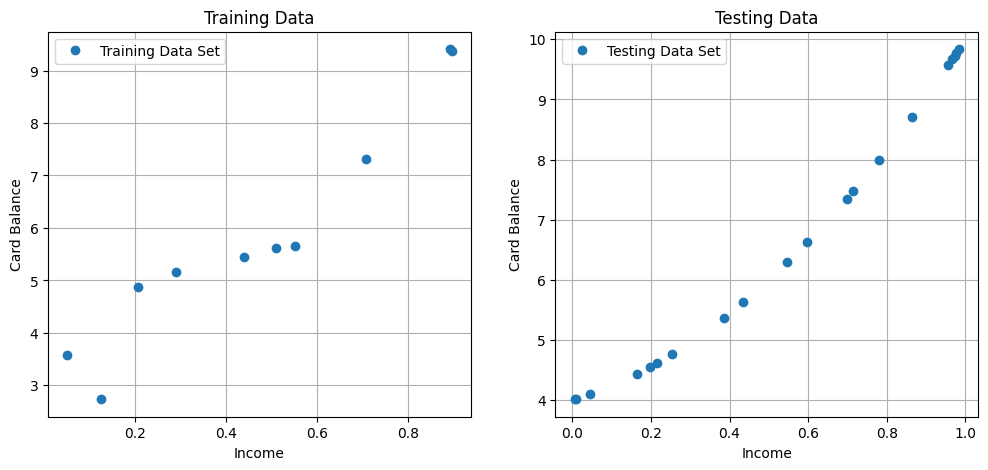

In [52]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_income, train_balance, 'o', label='Training Data Set')
plt.xlabel('Income')
plt.ylabel('Card Balance')
plt.title('Training Data')
plt.grid()
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(test_income, test_balance, 'o', label='Testing Data Set')
plt.xlabel('Income')
plt.ylabel('Card Balance')
plt.title('Testing Data')
plt.grid()
plt.legend()

plt.show()

<p> Gradient Descent Algorithm and Other important function implementations.

In [53]:
"""
    GM: Gradient Descent Method
    NM: Normal Matrix Method
    M: Order of Polynomial
    X: Income
    Y: Card Balance
    k: Regularization Parameter
"""

def generateAMatrix(M, X):
    A = []
    for x in X:
        row = []
        for i in range(M, -1, -1):
            row.append(x ** i)
        A.append(row)
    return np.array(A)

def gradient_descent(X, Y, M, k, accuracy=1e-3, max_iteration=1000):

    A = generateAMatrix(M, X)
    N, K = len(A), len(A[0])
    Wo = np.random.randn(K)
    alpha = 0.001

    for it in range(max_iteration):
        Wn = (1 - k * alpha) * Wo +  alpha * np.sum([(Y[i] - np.dot(Wo, A[i])) * A[i] for i in range(N)], axis=0)
        if np.linalg.norm(Wn-Wo) < accuracy:
            break
        Wo = Wn

    return Wo

def train_regularized_regression_model(X, Y, M, k):

    A = generateAMatrix(M, X)
    N = len(A[0])

    At = np.transpose(A)
    At_A = At.dot(A)
    kI = k * np.identity(N)
    At_A_KI = At_A + kI
    At_A_KI_inv = np.linalg.inv(At_A_KI)
    At_A_KI_inv_At = At_A_KI_inv.dot(At)
    W = At_A_KI_inv_At.dot(Y)

    return W

def predict_regression_model(M, X, W):

    x = np.array(X)
    y = np.zeros(len(x), dtype=float)
    for i in range(M, -1, -1):
        y += W[M-i] * (x ** i)
    return y

<p> Gradient Discent on Training Set and Prediction of balance on Testing Set
<h3> M = 1

Weights for (M=1, λ=0) using Gradient Descent Method:  [5.48534476 3.40274093]
Weights for (M=1, λ=0) using Normal Method:  [6.99712306 2.64562588]
Weights for (M=1, λ=0.2) using Gradient Descent Method:  [4.65403816 3.72101826]
Weights for (M=1, λ=0.2) using Normal Method:  [5.9098771  3.09207448]
Weights for (M=1, λ=0.5) using Gradient Descent Method:  [3.88953048 3.9625239 ]
Weights for (M=1, λ=0.5) using Normal Method:  [4.95572339 3.42855726]


Regularized Polynomial Regression of order 1 with different values of λ.



Type Method    λ      NMSE      RMSE       MAE        R2
0   Train     GM  0.0  0.124341  0.737501  0.591511  0.875659
1    Test     GM  0.0  0.066487  0.559936  0.420378  0.933513
2   Train     NM  0.0  0.080855  0.594715  0.564105  0.919145
3    Test     NM  0.0  0.067116  0.562580  0.404099  0.932884
4   Train     GM  0.2  0.184013  0.897183  0.700915  0.815987
5    Test     GM  0.2  0.135895  0.800517  0.563433  0.864105
6   Train     NM  0.2  0.103921  0.674230  0.573221  0.896079
7    Test     NM  0.2  0.071308  0.579879  0.458940  0.928692
8   Train     GM  0.5  0.266375  1.079452  0.801528  0.733625
9    Test     GM  0.5  0.251557  1.089151  0.755881  0.748443
10  Train     NM  0.5  0.165808  0.851645  0.661212  0.834192
11   Test     NM  0.5  0.146297  0.830590  0.628771  0.853703

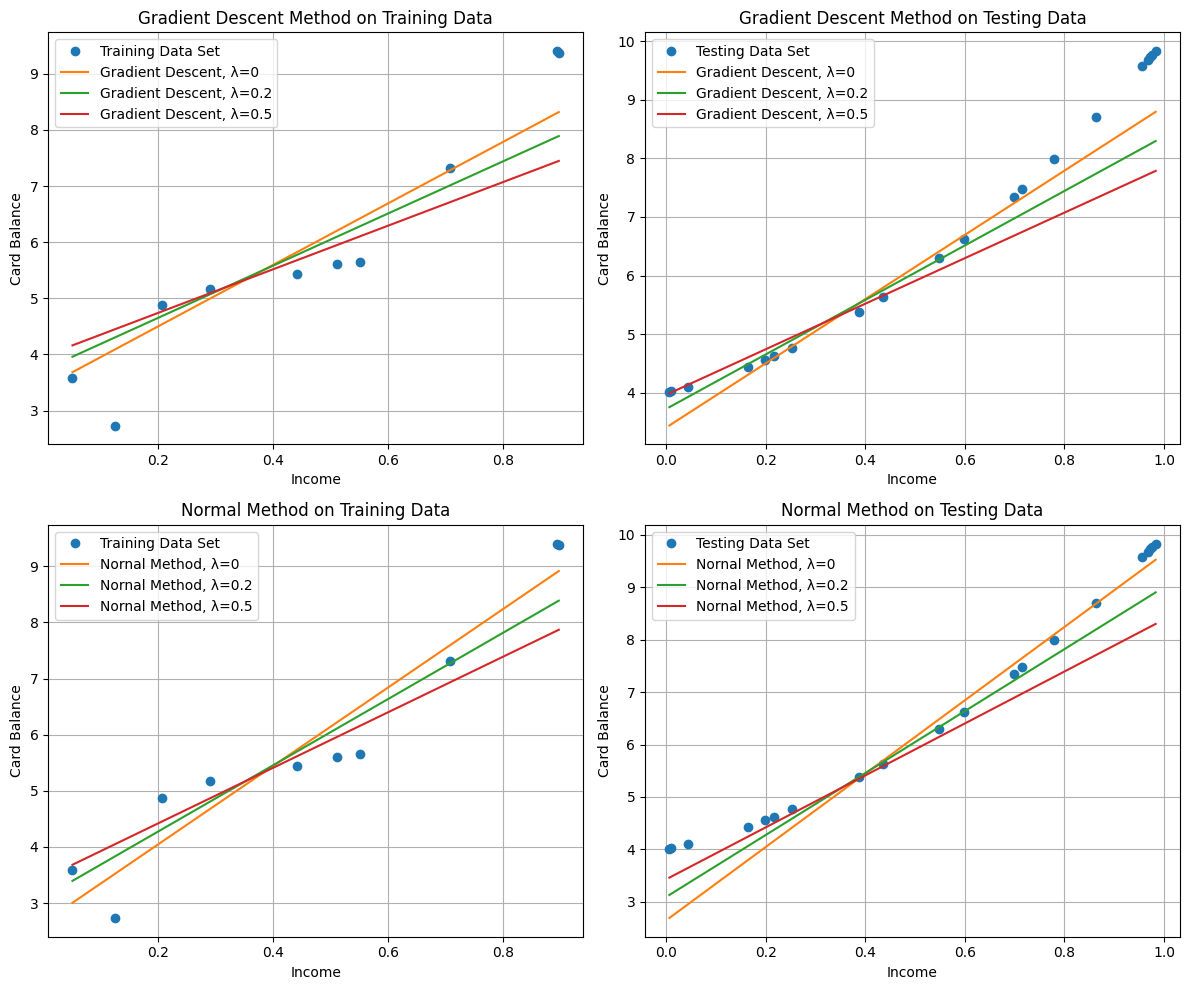

In [54]:
M = 1
k_values = [0, 0.2, 0.5]
data = {
    'Type': [],
    'Method': [],
    'λ': [],
    'NMSE': [],
    'RMSE': [],
    'MAE': [],
    'R2': []
}

plt.figure(figsize=(12, 10))

# Initial plots parameters
plot_positions = [1, 2, 3, 4]
plot_titles = ['Gradient Descent Method on Training Data', 'Gradient Descent Method on Testing Data', 'Normal Method on Training Data', 'Normal Method on Testing Data']
plot_labels = ['Training Data Set', 'Testing Data Set', 'Training Data Set', 'Testing Data Set']
datasets = [(train_income, train_balance), (test_income, test_balance), (train_income, train_balance), (test_income, test_balance)]

# Ploting the initial data points
for i in range(4):

    plt.subplot(2, 2, plot_positions[i])
    a = sorted(zip(datasets[i][0], datasets[i][1]))
    x, y = zip(*a)
    plt.plot(x, y, 'o', label=plot_labels[i])
    plt.xlabel('Income')
    plt.ylabel('Card Balance')
    plt.title(plot_titles[i])
    plt.grid()
    plt.legend(loc='best')

# End initial dataset plots

for k in k_values:

    # Estimate weights using Gradient Descent and Normal Method
    W_GM = gradient_descent(train_income, train_balance, M, k)
    W_NM = train_regularized_regression_model(train_income, train_balance, M, k)

    print(f"Weights for (M={M}, λ={k}) using Gradient Descent Method: ", W_GM)
    print(f"Weights for (M={M}, λ={k}) using Normal Method: ", W_NM)

    # Just a column insertion for data frame
    # Format:
    #    λ    Type    Method
    #    k    Train     GM
    #    k    Test      GM
    #    k    Train     NM
    #    k    Test      NM
    for i in range(4):
        data['λ'].append(k)
        if i % 2 == 0:
            data['Type'].append('Train')
        else:
            data['Type'].append('Test')
        if i < 2:
            data['Method'].append('GM')
        else:
            data['Method'].append('NM')
    # End Format

    # Prediction for train and test data set using Gradient Descent Method
    predicted_balance_train_set_GM = predict_regression_model(M, train_income, W_GM)
    predicted_balance_test_set_GM = predict_regression_model(M, test_income, W_GM)

    # Prediction for train and test data set using Normal Method
    predicted_balance_train_set_NM = predict_regression_model(M, train_income, W_NM)
    predicted_balance_test_set_NM = predict_regression_model(M, test_income, W_NM)

    # Calculating Evaluation Parameters for Gradient Descent Method
    data['NMSE'].append(NMSE(train_balance, predicted_balance_train_set_GM))
    data['NMSE'].append(NMSE(test_balance, predicted_balance_test_set_GM))
    data['RMSE'].append(RMSE(train_balance, predicted_balance_train_set_GM))
    data['RMSE'].append(RMSE(test_balance, predicted_balance_test_set_GM))
    data['MAE'].append(MAE(train_balance, predicted_balance_train_set_GM))
    data['MAE'].append(MAE(test_balance, predicted_balance_test_set_GM))
    data['R2'].append(R2(train_balance, predicted_balance_train_set_GM))
    data['R2'].append(R2(test_balance, predicted_balance_test_set_GM))

    # Calculating Evaluation Parameters for Normal Method
    data['NMSE'].append(NMSE(train_balance, predicted_balance_train_set_NM))
    data['NMSE'].append(NMSE(test_balance, predicted_balance_test_set_NM))
    data['RMSE'].append(RMSE(train_balance, predicted_balance_train_set_NM))
    data['RMSE'].append(RMSE(test_balance, predicted_balance_test_set_NM))
    data['MAE'].append(MAE(train_balance, predicted_balance_train_set_NM))
    data['MAE'].append(MAE(test_balance, predicted_balance_test_set_NM))
    data['R2'].append(R2(train_balance, predicted_balance_train_set_NM))
    data['R2'].append(R2(test_balance, predicted_balance_test_set_NM))

    # Plots for Gradient Descent Method
    a = sorted(zip(train_income, predicted_balance_train_set_GM))
    x, y = zip(*a)
    plt.subplot(2, 2, 1)
    plt.plot(x, y, label=f'Gradient Descent, λ={k}')
    plt.legend(loc='best')

    a = sorted(zip(test_income, predicted_balance_test_set_GM))
    x, y = zip(*a)
    plt.subplot(2, 2, 2)
    plt.plot(x, y, label=f'Gradient Descent, λ={k}')
    plt.legend(loc='best')

    # Plots for Normal Method
    a = sorted(zip(train_income, predicted_balance_train_set_NM))
    x, y = zip(*a)
    plt.subplot(2, 2, 3)
    plt.plot(x, y, label=f'Nornal Method, λ={k}')
    plt.legend(loc='best')

    a = sorted(zip(test_income, predicted_balance_test_set_NM))
    x, y = zip(*a)
    plt.subplot(2, 2, 4)
    plt.plot(x, y, label=f'Nornal Method, λ={k}')
    plt.legend(loc='best')

# Ploting Evaluation Parameters for both the datasets and both the methods
print(f"\n\nRegularized Polynomial Regression of order {M} with different values of λ.\n")
df = pd.DataFrame(data)
display(df)
print("\n")

plt.tight_layout()
plt.show()


<p> Gradient Discent on Training Set and Prediction of balance on Testing Set
<h3> M = 2

Weights for (M=2, λ=0) using Gradient Descent Method:  [2.75192714 3.37988804 3.56043428]
Weights for (M=2, λ=0) using Normal Method:  [4.58691451 2.51115423 3.36363268]
Weights for (M=2, λ=0.2) using Gradient Descent Method:  [3.12138128 2.64460977 3.72042947]
Weights for (M=2, λ=0.2) using Normal Method:  [3.18475606 3.42357986 3.29281647]
Weights for (M=2, λ=0.5) using Gradient Descent Method:  [3.12957388 2.30456412 3.7607842 ]
Weights for (M=2, λ=0.5) using Normal Method:  [2.81422041 3.23775894 3.38757834]


Regularized Polynomial Regression of order 2 with different values of λ.



Type Method    λ      NMSE      RMSE       MAE        R2
0   Train     GM  0.0  0.077265  0.581364  0.471361  0.922735
1    Test     GM  0.0  0.012307  0.240902  0.211433  0.987693
2   Train     NM  0.0  0.056708  0.498058  0.371661  0.943292
3    Test     NM  0.0  0.035943  0.411699  0.365816  0.964057
4   Train     GM  0.2  0.090997  0.630914  0.511927  0.909003
5    Test     GM  0.2  0.021537  0.318683  0.295053  0.978463
6   Train     NM  0.2  0.063909  0.528735  0.424828  0.936091
7    Test     NM  0.2  0.026186  0.351403  0.277202  0.973814
8   Train     GM  0.5  0.113469  0.704522  0.565981  0.886531
9    Test     GM  0.5  0.050422  0.487617  0.434385  0.949578
10  Train     NM  0.5  0.085913  0.613037  0.498097  0.914087
11   Test     NM  0.5  0.042513  0.447743  0.435138  0.957487

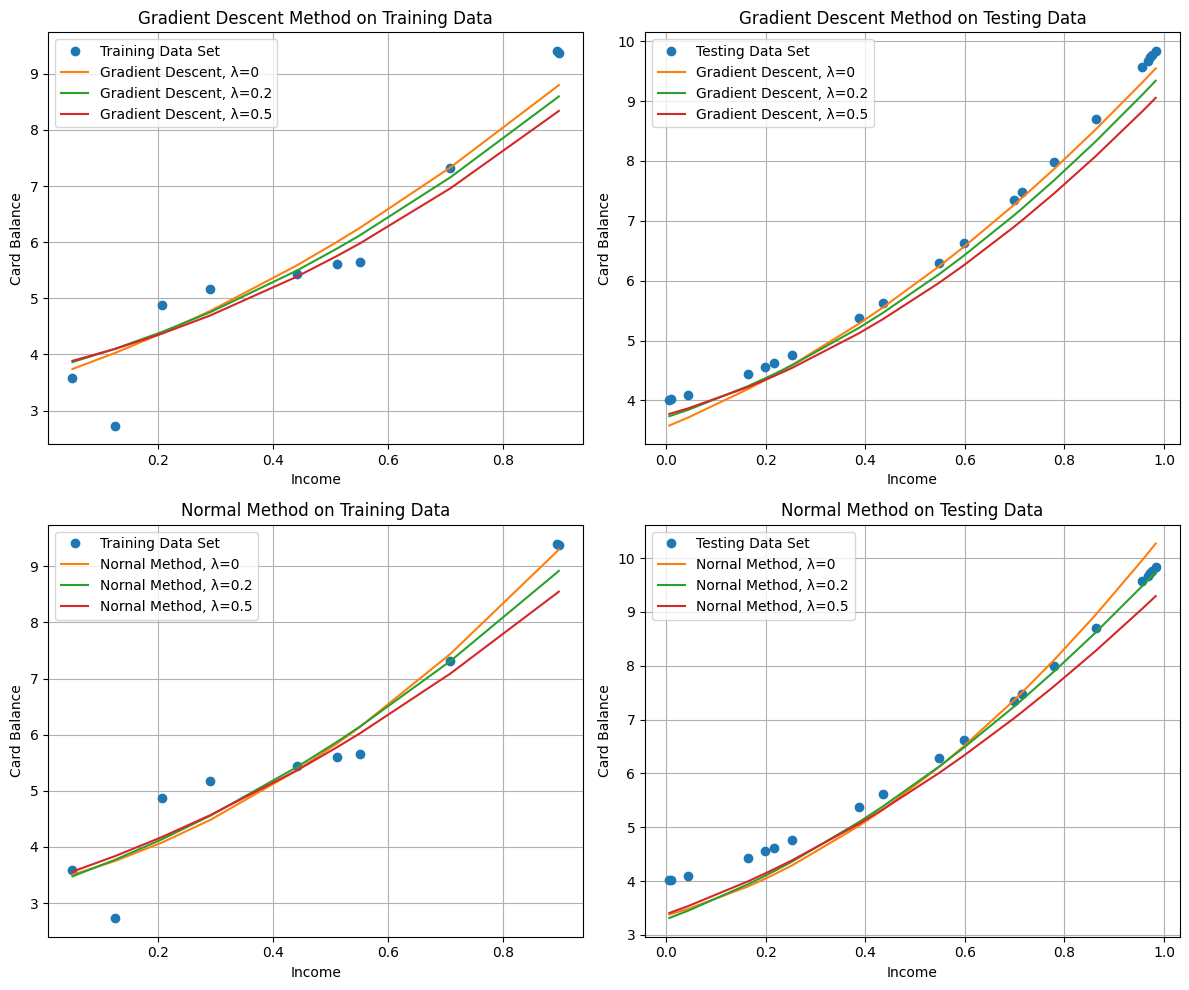

In [55]:
M = 2
k_values = [0, 0.2, 0.5]
data = {
    'Type': [],
    'Method': [],
    'λ': [],
    'NMSE': [],
    'RMSE': [],
    'MAE': [],
    'R2': []
}

plt.figure(figsize=(12, 10))

# Initial plots parameters
plot_positions = [1, 2, 3, 4]
plot_titles = ['Gradient Descent Method on Training Data', 'Gradient Descent Method on Testing Data', 'Normal Method on Training Data', 'Normal Method on Testing Data']
plot_labels = ['Training Data Set', 'Testing Data Set', 'Training Data Set', 'Testing Data Set']
datasets = [(train_income, train_balance), (test_income, test_balance), (train_income, train_balance), (test_income, test_balance)]

# Ploting the initial data points
for i in range(4):

    plt.subplot(2, 2, plot_positions[i])
    a = sorted(zip(datasets[i][0], datasets[i][1]))
    x, y = zip(*a)
    plt.plot(x, y, 'o', label=plot_labels[i])
    plt.xlabel('Income')
    plt.ylabel('Card Balance')
    plt.title(plot_titles[i])
    plt.grid()
    plt.legend(loc='best')

# End initial dataset plots

for k in k_values:

    # Estimate weights using Gradient Descent and Normal Method
    W_GM = gradient_descent(train_income, train_balance, M, k)
    W_NM = train_regularized_regression_model(train_income, train_balance, M, k)

    print(f"Weights for (M={M}, λ={k}) using Gradient Descent Method: ", W_GM)
    print(f"Weights for (M={M}, λ={k}) using Normal Method: ", W_NM)

    # Just a column insertion for data frame
    # Format:
    #    λ    Type    Method
    #    k    Train     GM
    #    k    Test      GM
    #    k    Train     NM
    #    k    Test      NM
    for i in range(4):
        data['λ'].append(k)
        if i % 2 == 0:
            data['Type'].append('Train')
        else:
            data['Type'].append('Test')
        if i < 2:
            data['Method'].append('GM')
        else:
            data['Method'].append('NM')
    # End Format

    # Prediction for train and test data set using Gradient Descent Method
    predicted_balance_train_set_GM = predict_regression_model(M, train_income, W_GM)
    predicted_balance_test_set_GM = predict_regression_model(M, test_income, W_GM)

    # Prediction for train and test data set using Normal Method
    predicted_balance_train_set_NM = predict_regression_model(M, train_income, W_NM)
    predicted_balance_test_set_NM = predict_regression_model(M, test_income, W_NM)

    # Calculating Evaluation Parameters for Gradient Descent Method
    data['NMSE'].append(NMSE(train_balance, predicted_balance_train_set_GM))
    data['NMSE'].append(NMSE(test_balance, predicted_balance_test_set_GM))
    data['RMSE'].append(RMSE(train_balance, predicted_balance_train_set_GM))
    data['RMSE'].append(RMSE(test_balance, predicted_balance_test_set_GM))
    data['MAE'].append(MAE(train_balance, predicted_balance_train_set_GM))
    data['MAE'].append(MAE(test_balance, predicted_balance_test_set_GM))
    data['R2'].append(R2(train_balance, predicted_balance_train_set_GM))
    data['R2'].append(R2(test_balance, predicted_balance_test_set_GM))

    # Calculating Evaluation Parameters for Normal Method
    data['NMSE'].append(NMSE(train_balance, predicted_balance_train_set_NM))
    data['NMSE'].append(NMSE(test_balance, predicted_balance_test_set_NM))
    data['RMSE'].append(RMSE(train_balance, predicted_balance_train_set_NM))
    data['RMSE'].append(RMSE(test_balance, predicted_balance_test_set_NM))
    data['MAE'].append(MAE(train_balance, predicted_balance_train_set_NM))
    data['MAE'].append(MAE(test_balance, predicted_balance_test_set_NM))
    data['R2'].append(R2(train_balance, predicted_balance_train_set_NM))
    data['R2'].append(R2(test_balance, predicted_balance_test_set_NM))

    # Plots for Gradient Descent Method
    a = sorted(zip(train_income, predicted_balance_train_set_GM))
    x, y = zip(*a)
    plt.subplot(2, 2, 1)
    plt.plot(x, y, label=f'Gradient Descent, λ={k}')
    plt.legend(loc='best')

    a = sorted(zip(test_income, predicted_balance_test_set_GM))
    x, y = zip(*a)
    plt.subplot(2, 2, 2)
    plt.plot(x, y, label=f'Gradient Descent, λ={k}')
    plt.legend(loc='best')

    # Plots for Normal Method
    a = sorted(zip(train_income, predicted_balance_train_set_NM))
    x, y = zip(*a)
    plt.subplot(2, 2, 3)
    plt.plot(x, y, label=f'Nornal Method, λ={k}')
    plt.legend(loc='best')

    a = sorted(zip(test_income, predicted_balance_test_set_NM))
    x, y = zip(*a)
    plt.subplot(2, 2, 4)
    plt.plot(x, y, label=f'Nornal Method, λ={k}')
    plt.legend(loc='best')

# Ploting Evaluation Parameters for both the datasets and both the methods
print(f"\n\nRegularized Polynomial Regression of order {M} with different values of λ.\n")
df = pd.DataFrame(data)
display(df)
print("\n")

plt.tight_layout()
plt.show()


<p> Gradient Discent on Training Set and Prediction of balance on Testing Set
<h3> M = 5

Weights for (M=5, λ=0) using Gradient Descent Method:  [1.16369246 2.20825146 1.4812785  1.56085855 1.74127755 3.66970177]
Weights for (M=5, λ=0) using Normal Method:  [ -772.80767019  1794.01633687 -1473.36633361   511.06803371
   -63.22211528     5.55381242]
Weights for (M=5, λ=0.2) using Gradient Descent Method:  [0.67326168 1.61627027 1.47255758 1.33402057 1.80099449 3.95213904]
Weights for (M=5, λ=0.2) using Normal Method:  [0.81071051 0.96776704 1.21762206 1.7091762  2.74962994 3.49437814]
Weights for (M=5, λ=0.5) using Gradient Descent Method:  [2.02665406 1.17332372 0.24091947 1.00592592 3.28139163 3.34270773]
Weights for (M=5, λ=0.5) using Normal Method:  [0.84739247 1.01212727 1.25605922 1.67303367 2.46501798 3.51118174]


Regularized Polynomial Regression of order 5 with different values of λ.



Type Method    λ      NMSE      RMSE       MAE        R2
0   Train     GM  0.0  0.072366  0.562630  0.448621  0.927634
1    Test     GM  0.0  0.150296  0.841868  0.714049  0.849704
2   Train     NM  0.0  0.015380  0.259377  0.192905  0.984620
3    Test     NM  0.0  1.408765  2.577442  1.656087 -0.408765
4   Train     GM  0.2  0.074524  0.570957  0.430668  0.925476
5    Test     GM  0.2  0.038021  0.423430  0.362689  0.961979
6   Train     NM  0.2  0.056389  0.496653  0.350010  0.943611
7    Test     NM  0.2  0.056184  0.514725  0.481994  0.943816
8   Train     GM  0.5  0.062537  0.523028  0.408959  0.937463
9    Test     GM  0.5  0.078269  0.607525  0.579868  0.921731
10  Train     NM  0.5  0.066050  0.537519  0.424499  0.933950
11   Test     NM  0.5  0.053645  0.502962  0.488165  0.946355

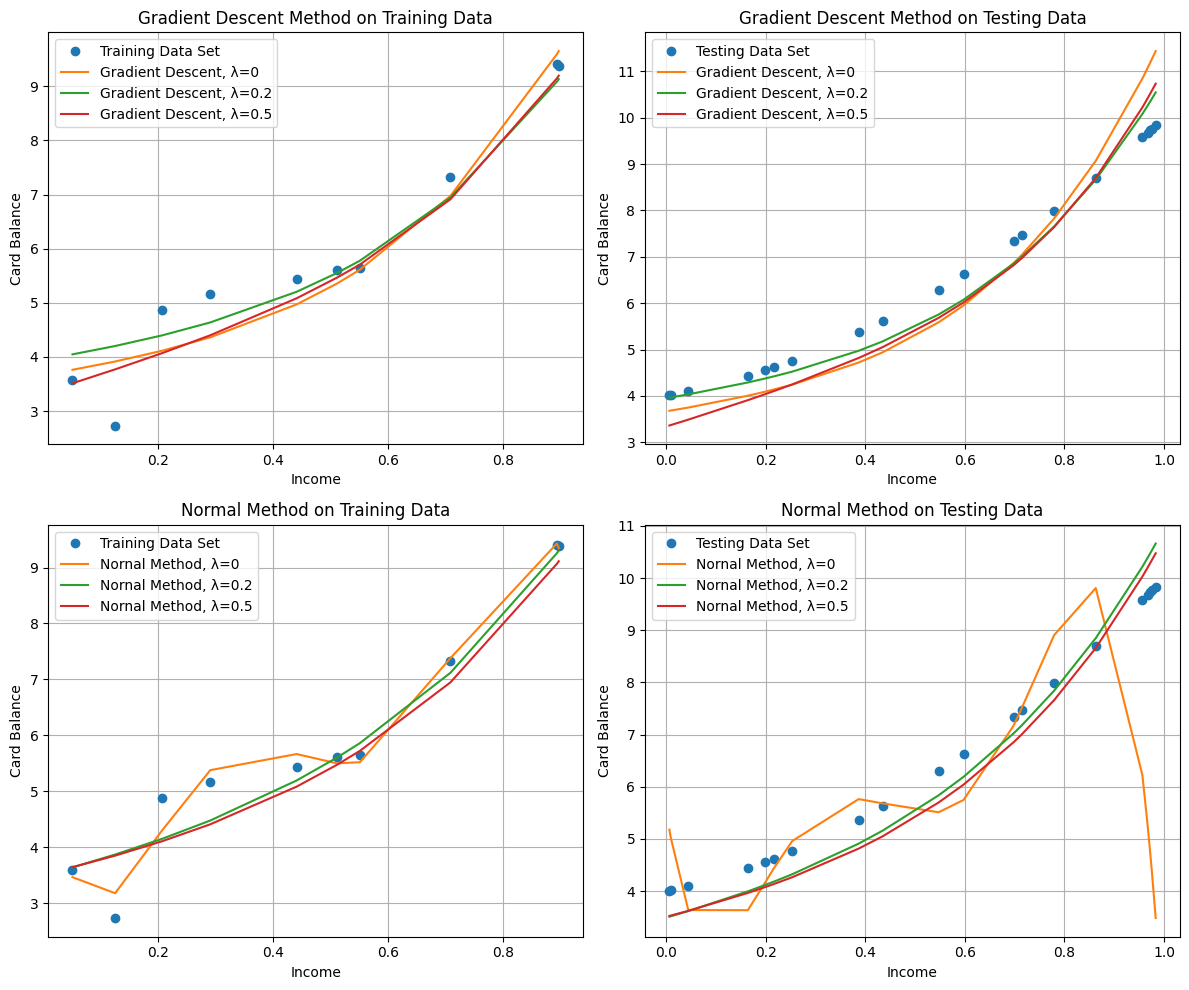

In [56]:
M = 5
k_values = [0, 0.2, 0.5]
data = {
    'Type': [],
    'Method': [],
    'λ': [],
    'NMSE': [],
    'RMSE': [],
    'MAE': [],
    'R2': []
}

plt.figure(figsize=(12, 10))

# Initial plots parameters
plot_positions = [1, 2, 3, 4]
plot_titles = ['Gradient Descent Method on Training Data', 'Gradient Descent Method on Testing Data', 'Normal Method on Training Data', 'Normal Method on Testing Data']
plot_labels = ['Training Data Set', 'Testing Data Set', 'Training Data Set', 'Testing Data Set']
datasets = [(train_income, train_balance), (test_income, test_balance), (train_income, train_balance), (test_income, test_balance)]

# Ploting the initial data points
for i in range(4):

    plt.subplot(2, 2, plot_positions[i])
    a = sorted(zip(datasets[i][0], datasets[i][1]))
    x, y = zip(*a)
    plt.plot(x, y, 'o', label=plot_labels[i])
    plt.xlabel('Income')
    plt.ylabel('Card Balance')
    plt.title(plot_titles[i])
    plt.grid()
    plt.legend(loc='best')

# End initial dataset plots

for k in k_values:

    # Estimate weights using Gradient Descent and Normal Method
    W_GM = gradient_descent(train_income, train_balance, M, k)
    W_NM = train_regularized_regression_model(train_income, train_balance, M, k)

    print(f"Weights for (M={M}, λ={k}) using Gradient Descent Method: ", W_GM)
    print(f"Weights for (M={M}, λ={k}) using Normal Method: ", W_NM)

    # Just a column insertion for data frame
    # Format:
    #    λ    Type    Method
    #    k    Train     GM
    #    k    Test      GM
    #    k    Train     NM
    #    k    Test      NM
    for i in range(4):
        data['λ'].append(k)
        if i % 2 == 0:
            data['Type'].append('Train')
        else:
            data['Type'].append('Test')
        if i < 2:
            data['Method'].append('GM')
        else:
            data['Method'].append('NM')
    # End Format

    # Prediction for train and test data set using Gradient Descent Method
    predicted_balance_train_set_GM = predict_regression_model(M, train_income, W_GM)
    predicted_balance_test_set_GM = predict_regression_model(M, test_income, W_GM)

    # Prediction for train and test data set using Normal Method
    predicted_balance_train_set_NM = predict_regression_model(M, train_income, W_NM)
    predicted_balance_test_set_NM = predict_regression_model(M, test_income, W_NM)

    # Calculating Evaluation Parameters for Gradient Descent Method
    data['NMSE'].append(NMSE(train_balance, predicted_balance_train_set_GM))
    data['NMSE'].append(NMSE(test_balance, predicted_balance_test_set_GM))
    data['RMSE'].append(RMSE(train_balance, predicted_balance_train_set_GM))
    data['RMSE'].append(RMSE(test_balance, predicted_balance_test_set_GM))
    data['MAE'].append(MAE(train_balance, predicted_balance_train_set_GM))
    data['MAE'].append(MAE(test_balance, predicted_balance_test_set_GM))
    data['R2'].append(R2(train_balance, predicted_balance_train_set_GM))
    data['R2'].append(R2(test_balance, predicted_balance_test_set_GM))

    # Calculating Evaluation Parameters for Normal Method
    data['NMSE'].append(NMSE(train_balance, predicted_balance_train_set_NM))
    data['NMSE'].append(NMSE(test_balance, predicted_balance_test_set_NM))
    data['RMSE'].append(RMSE(train_balance, predicted_balance_train_set_NM))
    data['RMSE'].append(RMSE(test_balance, predicted_balance_test_set_NM))
    data['MAE'].append(MAE(train_balance, predicted_balance_train_set_NM))
    data['MAE'].append(MAE(test_balance, predicted_balance_test_set_NM))
    data['R2'].append(R2(train_balance, predicted_balance_train_set_NM))
    data['R2'].append(R2(test_balance, predicted_balance_test_set_NM))

    # Plots for Gradient Descent Method
    a = sorted(zip(train_income, predicted_balance_train_set_GM))
    x, y = zip(*a)
    plt.subplot(2, 2, 1)
    plt.plot(x, y, label=f'Gradient Descent, λ={k}')
    plt.legend(loc='best')

    a = sorted(zip(test_income, predicted_balance_test_set_GM))
    x, y = zip(*a)
    plt.subplot(2, 2, 2)
    plt.plot(x, y, label=f'Gradient Descent, λ={k}')
    plt.legend(loc='best')

    # Plots for Normal Method
    a = sorted(zip(train_income, predicted_balance_train_set_NM))
    x, y = zip(*a)
    plt.subplot(2, 2, 3)
    plt.plot(x, y, label=f'Nornal Method, λ={k}')
    plt.legend(loc='best')

    a = sorted(zip(test_income, predicted_balance_test_set_NM))
    x, y = zip(*a)
    plt.subplot(2, 2, 4)
    plt.plot(x, y, label=f'Nornal Method, λ={k}')
    plt.legend(loc='best')

# Ploting Evaluation Parameters for both the datasets and both the methods
print(f"\n\nRegularized Polynomial Regression of order {M} with different values of λ.\n")
df = pd.DataFrame(data)
display(df)
print("\n")

plt.tight_layout()
plt.show()


<p align='justify'> Q3. Consider the motorcycle dataset. Estimate a regularized least square regression model (Also called Ridge Regression model) with Gaussian basis functions. Obtain the plot of estimated functions along with data points. Also obtain the $RMSE$, $MAE$, $NMSE$ and $R^2$ for evaluating the quality of fit.

<p> Importing data from xlsx file as a data frame and Plot of the given data set.

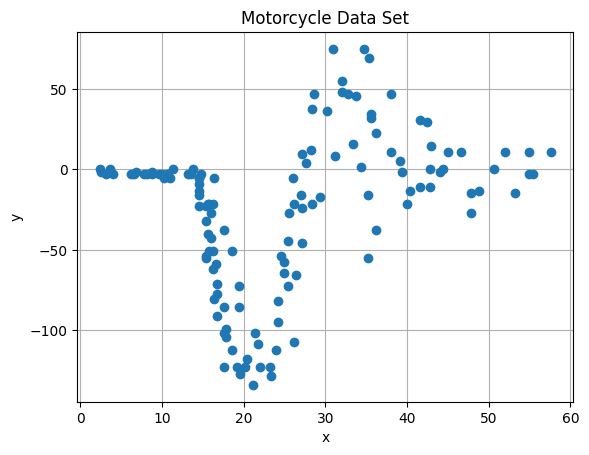

In [57]:
df = pd.read_excel('motorcycle.xlsx')

x = df['x'].values
y = df['y'].values

# print("X values:", x)
# print("Y values:", y)

plt.plot(x, y, 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Motorcycle Data Set')
plt.grid()
plt.show()

<p> Important Function Implementations.

In [58]:
"""
    mu_values: Array of M mean values each corresponsing to basis function
    sd_values: Array of M standard deviation values each corresponsing to basis function
"""

def gaussian_function(x, mu, sigma):
    return np.exp(-(x-mu)**2/(2*sigma**2))

def generateAMatrix(X, M, mu_values, sd_values):

    A = []
    N = len(X)
    for i in range(N):
        row = [1]
        for j in range(M):
            row.append(gaussian_function(X[i], mu_values[j], sd_values[j]))
        A.append(row)
    return np.array(A)

def train_regularized_regression_model(X, Y, k, mu_values, sd_values):

    A = generateAMatrix(X, len(mu_values), mu_values, sd_values)
    y = np.array(Y)
    n = len(A[0])
    At = np.transpose(A)
    At_A = At.dot(A)
    kI = k * np.identity(n)
    At_A_plus_kI = At_A + kI
    At_A_plus_kI_inv = np.linalg.inv(At_A_plus_kI)
    At_A_plus_kI_inv_At = At_A_plus_kI_inv.dot(At)
    w = At_A_plus_kI_inv_At.dot(y)
    return np.array(w)

def predict_regularized_regression_model(X, w, mu_values, sd_values):

    M, N = len(mu_values), len(X)
    A = []
    for i in range(N):
        row = [1]
        for j in range(M):
            row.append(gaussian_function(X[i], mu_values[j], sd_values[j]))
        A.append(row)
    return np.array(A).dot(w)

<p> Prediction Using Gaussian basis regression.

Weights for λ=0:  [35.43, -47.86, -4.86, -135.81, -46.01, -1.28, -37.6, -29.04]
Weights for λ=0.1:  [25.4, -34.57, 2.16, -129.19, -38.01, 7.97, -28.85, -19.96]
Weights for λ=0.5:  [10.03, -14.3, 11.24, -116.28, -26.89, 21.74, -15.15, -6.46]
Weights for λ=1:  [3.8, -6.25, 12.97, -107.83, -23.65, 26.72, -9.27, -1.49]
Weights for λ=5:  [-5.55, 3.73, 5.9, -77.79, -23.43, 28.79, 0.94, 3.12]


Regularized Gaussian Regression with different values of λ.



λ      NMSE       RMSE        MAE        R2
0  0.0  0.229197  23.046831  17.305179  0.770803
1  0.1  0.229917  23.082995  17.069314  0.770083
2  0.5  0.234590  23.316383  16.837334  0.765410
3  1.0  0.239745  23.571193  17.057145  0.760255
4  5.0  0.286910  25.785707  19.302625  0.713090

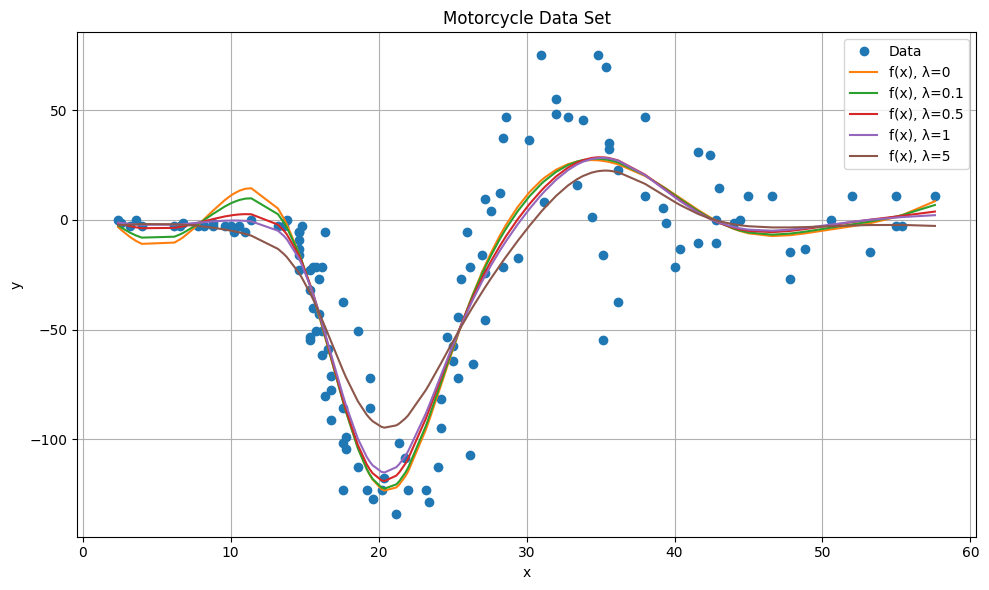

In [59]:
mu_values = [5, 15, 20, 25, 35, 45, 55]
sd_values = [4, 2, 3.5, 4, 4, 5, 5]
k_values = [0, 0.1, 0.5, 1, 5]

data = {
    'λ': [],
    'NMSE': [],
    'RMSE': [],
    'MAE': [],
    'R2': []
}

plt.figure(figsize=(10, 6))
plt.plot(x, y, 'o', label='Data')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Motorcycle Data Set')
plt.grid()
plt.legend(loc='best')

for k in k_values:

    W = train_regularized_regression_model(x, y, k, mu_values, sd_values)
    y_pred = predict_regularized_regression_model(x, W, mu_values, sd_values)
    print(f"Weights for λ={k}: ", list(np.round(W, 2)))

    data['λ'].append(k)
    data['NMSE'].append(NMSE(y, y_pred))
    data['RMSE'].append(RMSE(y, y_pred))
    data['MAE'].append(MAE(y, y_pred))
    data['R2'].append(R2(y, y_pred))

    plt.plot(x, y_pred, label=f'f(x), λ={k}')
    plt.legend(loc='best')

print(f"\n\nRegularized Gaussian Regression with different values of λ.\n")
df = pd.DataFrame(data)
display(df)
print("\n")

plt.tight_layout()
plt.show()